Setup

In [56]:
import numpy as np
import tensorflow as tf

Random points on a 2D plane

In [48]:
n_samples_per_class = 1_000
neg_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, .5], [.5, 1]],
    size=n_samples_per_class,
)
pos_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, .5], [.5, 1]],
    size=n_samples_per_class,
)

In [49]:
neg_samples.shape

(1000, 2)

In [50]:
inputs = np.vstack((neg_samples, pos_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [67]:
targets = np.vstack(
    (
        np.zeros((n_samples_per_class, 1), dtype="float32"),
        np.ones((n_samples_per_class, 1), dtype="float32"),
    )
)

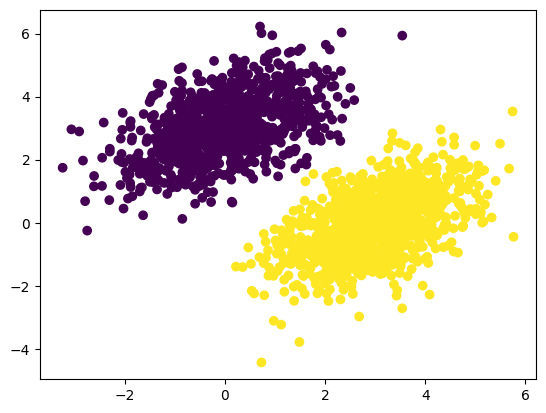

In [68]:
from matplotlib import pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [69]:
in_dim = 2
out_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(in_dim, out_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(out_dim,)))

In [70]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [71]:
def square_loss(targets, predictions):
  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss)

In [72]:
learning_rate = .1

def training_step(model, inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [75]:
n_steps = 40

for step in range(n_steps):
  loss = training_step(model, inputs, targets)
  if step % 5 == 0:
    print(f'loss at step {step}: {loss}')

loss at step 0: 0.024313462898135185
loss at step 5: 0.024288680404424667
loss at step 10: 0.024272948503494263
loss at step 15: 0.024262968450784683
loss at step 20: 0.024256631731987
loss at step 25: 0.02425261028110981
loss at step 30: 0.024250056594610214
loss at step 35: 0.024248437955975533


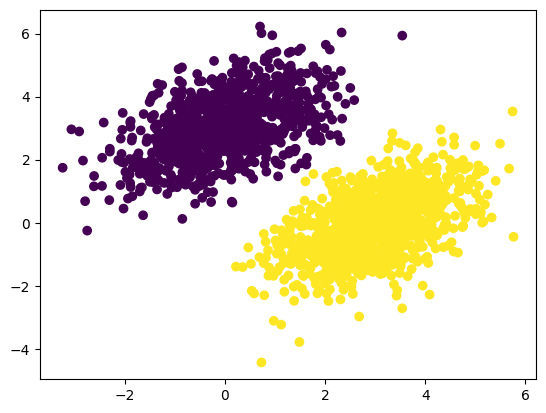

In [78]:
predictions = model(inputs)
plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

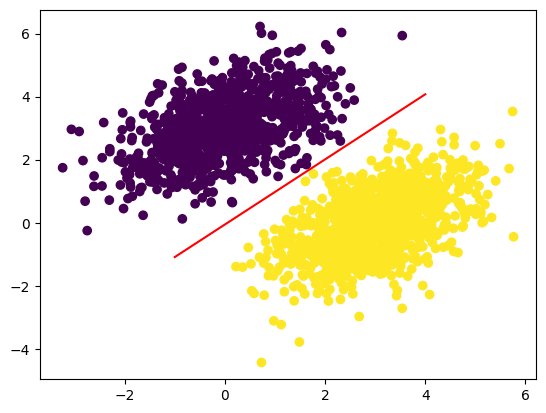

In [82]:
# model visualised as line
xs = np.linspace(-1, 4, 100)
ys = -W[0] / W[1] * xs + (0.5 - b) / W[1]
plt.plot(xs, ys, 'r-')

# model predictions
plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=predictions[:, 0] > 0.5)